In [5]:
# Create a plot with some random data points
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

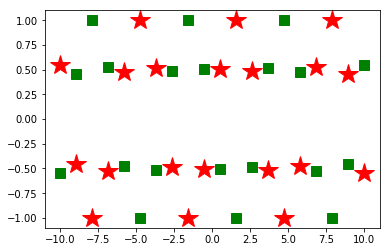

In [6]:
x = np.linspace(-10,10,20)
y = np.sin(x)
plt.plot(x,y, marker='*', linestyle='', color="red", markersize=20)
plt.plot(x,-y, marker='s', linestyle='', color="green", markersize=10)
plt.savefig("images/markers.png")

In [ ]:
from skimage.feature import blob_log
from skimage.color import rgb2gray
from skimage.io import imread

In [19]:
img = imread("images/markers.png")

In [21]:
img.shape

(288, 432, 4)

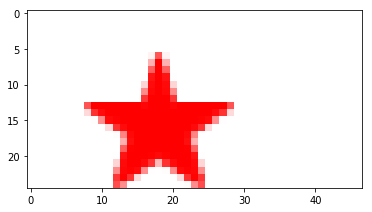

In [26]:
star_bounding_box = [(179,226),(214,251)]
cropped = img[star_bounding_box[0][1]:star_bounding_box[1][1], star_bounding_box[0][0]:star_bounding_box[0][1], :]
plt.imshow(cropped)

In [ ]:
# TODO: calculate these based on selection above:
fg_color = (255, 0, 0, 0)
fg_distance = 200


In [194]:
gray_img = np.zeros((img.shape[0],img.shape[1]))
for y in range(0, img.shape[0]):
    for x in range(0, img.shape[1]):
        dist = (img[y, x, :] - fg_color)[0:3]
        dist = np.sqrt(dist[0]*dist[0] + dist[1]*dist[1] + dist[2]*dist[2])
        if dist < fg_distance:
            gray_img[y,x] = 255

In [195]:
gray_img.shape

(288, 432)

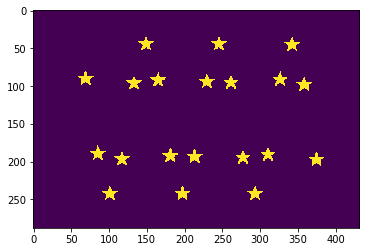

In [196]:
plt.imshow(gray_img)

In [197]:
blobs = blob_log(gray_img, max_sigma=20, min_sigma=16, threshold=0.5)

In [198]:
blobs.shape

(20, 3)

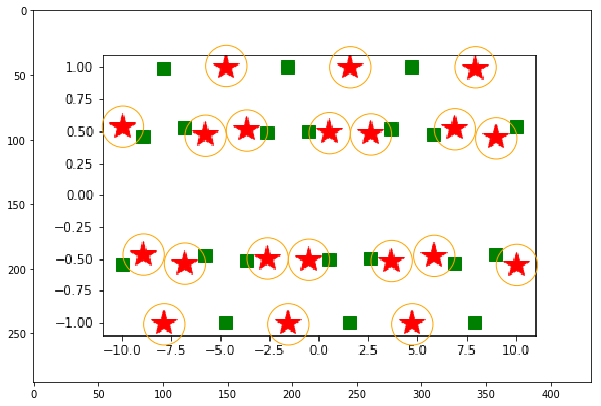

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(img)
for blob in blobs:
    x, y, r = blob
    c = plt.Circle((y, x), r, color="orange", fill=False)
    ax.add_patch(c)